In [1]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import cmath
import math

In [2]:
frequencies = [1, 2, 3]
ts_length = 50

TS = []
Time = np.linspace(0, len(frequencies)*ts_length, len(frequencies)*ts_length)
gaussian_noise = np.random.normal(0, 0.1, ts_length)

pi_to_pi = np.linspace(-np.pi, np.pi, 200)

period = 0
for freq in frequencies:
    TS = np.hstack((TS, 
                    np.cos(freq*np.linspace(period+0, period +ts_length, ts_length))
                      + np.sin(freq*np.linspace(period+0, period +ts_length, ts_length))
                    + gaussian_noise))
    period = TS.shape[0]

<IPython.core.display.Javascript object>


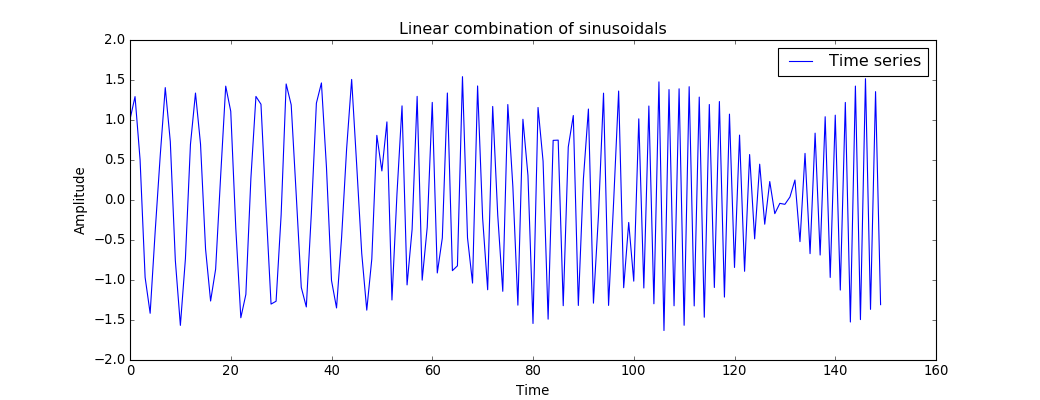

In [10]:
plt.figure(figsize=(13,5))
plt.plot(TS, label="Time series")
plt.title("Linear combination of sinusoidals")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.savefig('../reports/images/spectral_density_2/ts2.png')

In [11]:
plt.close()

In [5]:
def get_peridogram(X, llambda, time):
    return (1/X.shape[0]) * np.power(np.absolute(np.sum(X * np.power(np.e, (-1J*time*llambda)))), 2)

In [12]:
peridograms = []

for l in pi_to_pi:
    peridograms.append(get_peridogram(TS, l, Time))

<IPython.core.display.Javascript object>


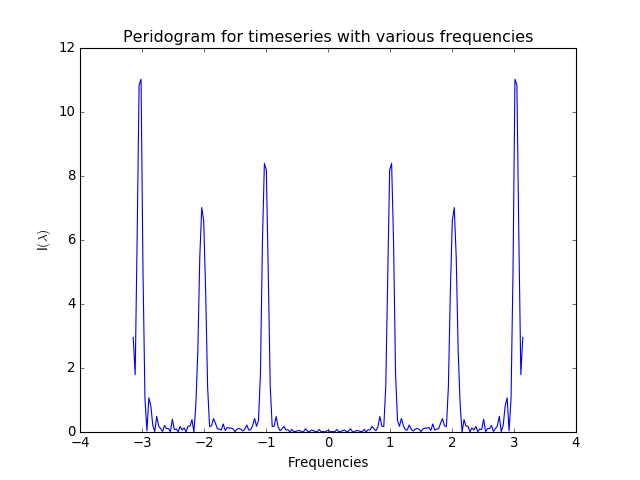

In [13]:
plt.title("Peridogram for timeseries with various frequencies")
plt.plot(pi_to_pi, peridograms)
plt.xlabel("Frequencies")
plt.ylabel("I$(\lambda)$")
plt.savefig('../reports/images/spectral_density_2/peri2.png')

In [14]:
plt.close()